<a href="https://colab.research.google.com/github/Kovibordy/ML-2.0/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# преобразовать категориальные признаки в category
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for column in categorical_columns:
    if column in df.columns:
        df[column] = df[column].astype('category')
        print(f"Колонка '{column}' преобразована в category")
        print(f"  Категории: {df[column].cat.categories.tolist()}")
df.info()

Колонка 'Gender' преобразована в category
  Категории: ['Female', 'Male']
Колонка 'Occupation' преобразована в category
  Категории: ['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer', 'Teacher']
Колонка 'BMI Category' преобразована в category
  Категории: ['Normal', 'Normal Weight', 'Obese', 'Overweight']
Колонка 'Blood Pressure' преобразована в category
  Категории: ['115/75', '115/78', '117/76', '118/75', '118/76', '119/77', '120/80', '121/79', '122/80', '125/80', '125/82', '126/83', '128/84', '128/85', '129/84', '130/85', '130/86', '131/86', '132/87', '135/88', '135/90', '139/91', '140/90', '140/95', '142/92']
Колонка 'Sleep Disorder' преобразована в category
  Категории: ['Insomnia', 'Sleep Apnea']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   ---------

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df['Sleep Duration']
X = df.drop('Sleep Duration', axis=1)

print(f"Целевая переменная: Sleep Duration")
print(f"Размеры: X {X.shape}, y {y.shape}")

Целевая переменная: Sleep Duration
Размеры: X (374, 12), y (374,)


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [ ]:
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Пропуски в данных:")
for col, count, percent in zip(missing_data.index, missing_data.values, missing_percent.values):
    if count > 0:
        print(f"  {col}: {count} пропусков ({percent:.1f}%)")

Пропуски в данных:
  Sleep Disorder: 219 пропусков (58.6%)


In [ ]:
print("Распределение целевой переменной 'Sleep Duration':")
print(f"Медиана: {df['Sleep Duration'].median():.2f} часов")
print(f"Среднее: {df['Sleep Duration'].mean():.2f} часов")
print(f"Стандартное отклонение: {df['Sleep Duration'].std():.2f} часов")
print(f"Минимум: {df['Sleep Duration'].min():.2f} часов")
print(f"Максимум: {df['Sleep Duration'].max():.2f} часов")

Распределение целевой переменной 'Sleep Duration':
Медиана: 7.20 часов
Среднее: 7.13 часов
Стандартное отклонение: 0.80 часов
Минимум: 5.80 часов
Максимум: 8.50 часов


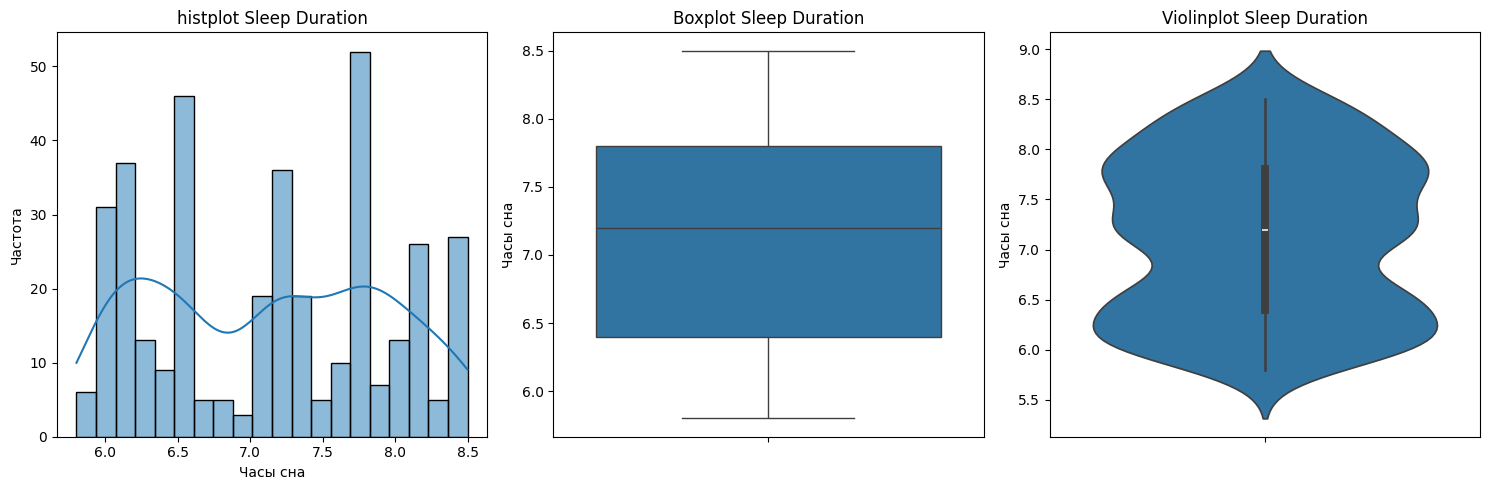

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sleep Duration'], kde=True, bins=20)
plt.title('histplot Sleep Duration')
plt.xlabel('Часы сна')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Sleep Duration'])
plt.title('Boxplot Sleep Duration')
plt.ylabel('Часы сна')

plt.subplot(1, 3, 3)
sns.violinplot(y=df['Sleep Duration'])
plt.title('Violinplot Sleep Duration')
plt.ylabel('Часы сна')

plt.tight_layout()
plt.show()

Исходя из данных, видим, что пиковые значения на 6.5 и примерно 8 часов сна

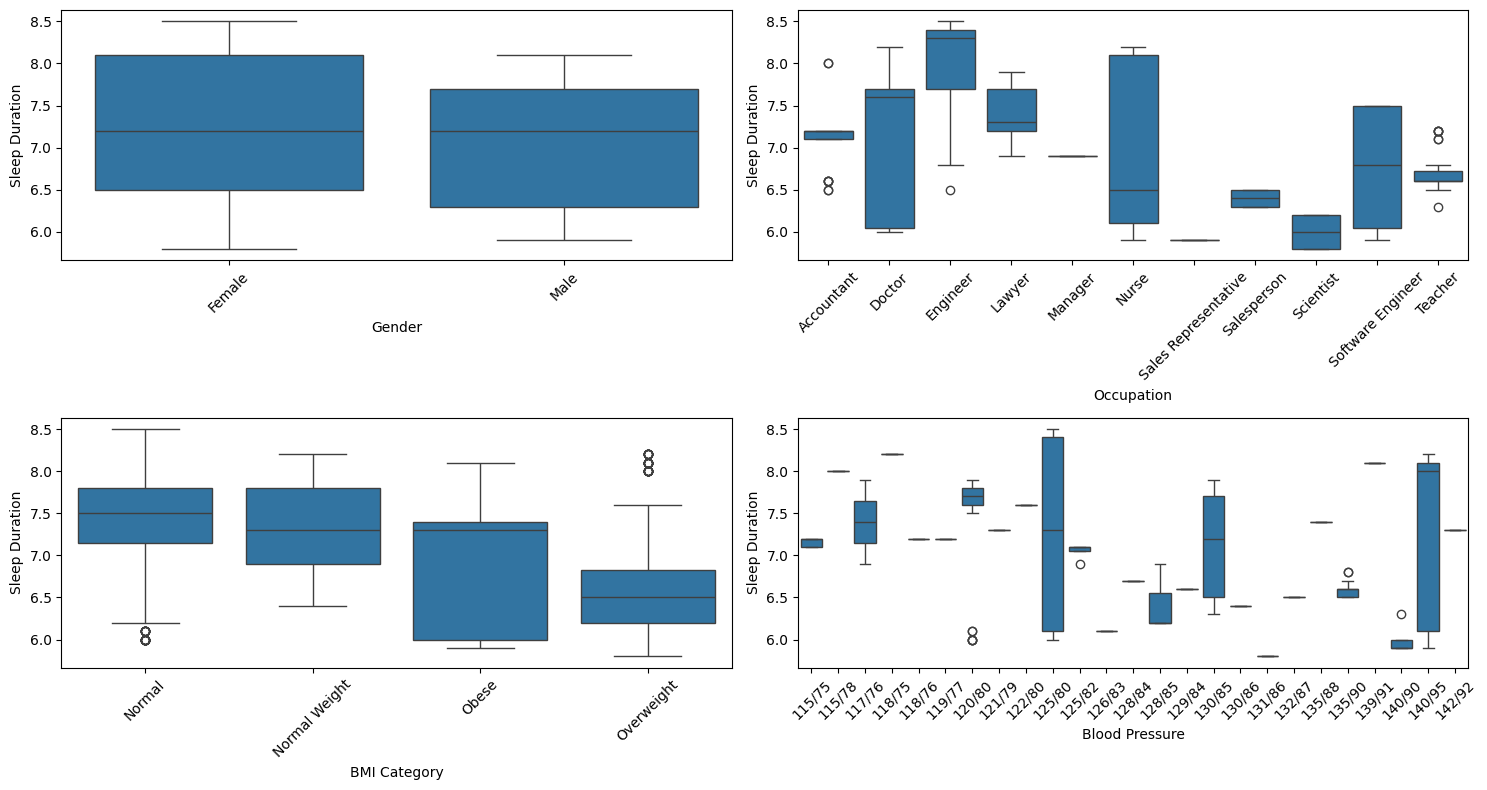

In [ ]:
# Y и категориальные признаки
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y=y, ax=axes[i//2, i%2])
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

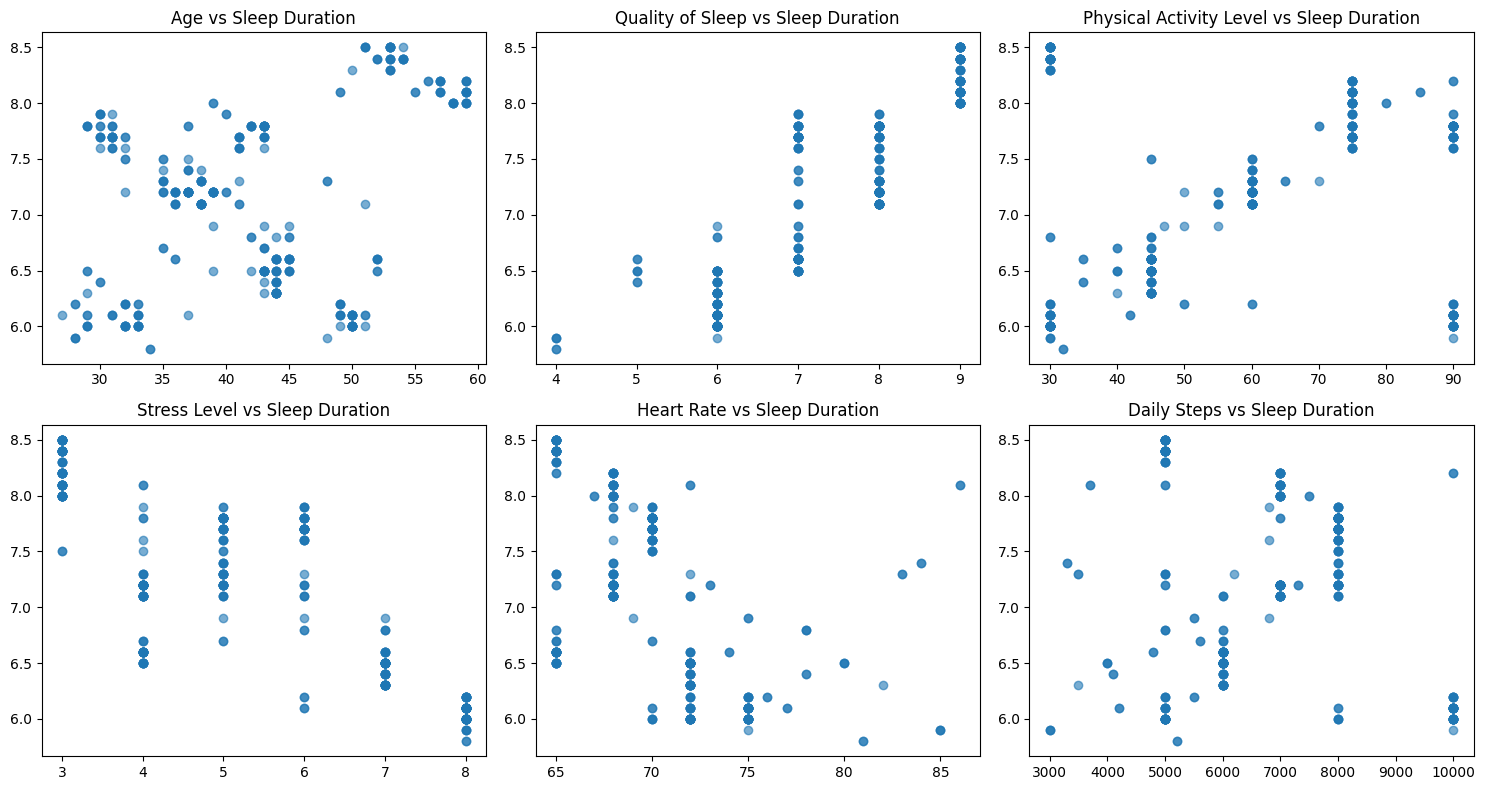

In [ ]:
# Y и числовые признаки
numeric_features = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    axes[i//3, i%3].scatter(df[feature], y, alpha=0.6)
    axes[i//3, i%3].set_title(f'{feature} vs Sleep Duration')
plt.tight_layout()
plt.show()

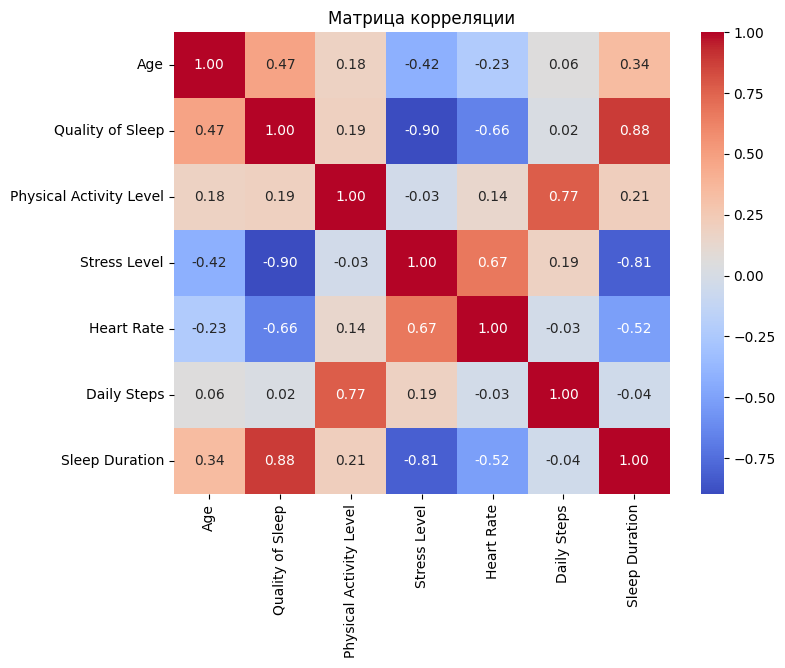

Корреляция с Sleep Duration:
Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Physical Activity Level    0.212360
Daily Steps               -0.039533
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64


In [ ]:
# Матрица корреляции
numeric_df = df[numeric_features + ['Sleep Duration']]
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

print("Корреляция с Sleep Duration:")
print(correlation_matrix['Sleep Duration'].sort_values(ascending=False))

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [ ]:
# Модель 1: Все признаки на всей выборке
X_model = X.copy()
y_model = y.copy()

# Разделяем признаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_model[numeric_features])
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X_model.index)

# OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X_model[categorical_features])

# Получаем названия колонок после кодирования
feature_names = []
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i]
    for category in categories[1:]:
        feature_names.append(f"{feature}_{category}")

X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names, index=X_model.index)

# Объединяем признаки
X_processed = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)

print(f"Размерность данных после обработки: {X_processed.shape}")

Размерность данных после обработки: (374, 7)


In [ ]:
# Обучаем модель 1
model1 = LinearRegression()
model1.fit(X_processed, y_model)
y_pred1 = model1.predict(X_processed)

# Метрики
mae1 = mean_absolute_error(y_model, y_pred1)
mse1 = mean_squared_error(y_model, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_model, y_pred1)

print("Модель 1 - Все признаки на всей выборке:")
print(f"MAE: {mae1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"R²: {r2_1:.4f}")

Модель 1 - Все признаки на всей выборке:
MAE: 0.2812
MSE: 0.1167
RMSE: 0.3416
R²: 0.8152


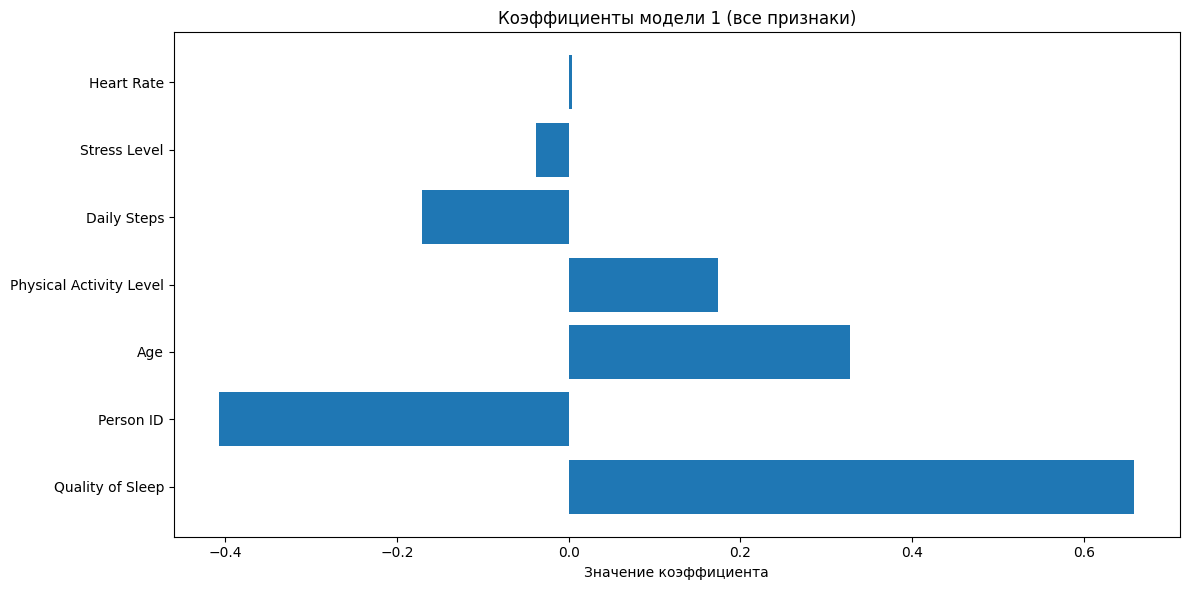

Все коэффициенты модели:
                   feature  coefficient
2         Quality of Sleep     0.658929
0                Person ID    -0.406848
1                      Age     0.327959
3  Physical Activity Level     0.174236
6              Daily Steps    -0.170977
4             Stress Level    -0.038566
5               Heart Rate     0.003484


In [ ]:
# Визуализация всех коэффициентов модели 1
coef_df1 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model1.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df1)), coef_df1['coefficient'])
plt.yticks(range(len(coef_df1)), coef_df1['feature'])
plt.title('Коэффициенты модели 1 (все признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Все коэффициенты модели:")
print(coef_df1)

In [ ]:
# Модель 2: Все признаки с разделением на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_model, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

# Метрики
metrics_train = {
    'MAE': mean_absolute_error(y_train, y_train_pred2),
    'MSE': mean_squared_error(y_train, y_train_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred2)),
    'R²': r2_score(y_train, y_train_pred2)
}

metrics_test = {
    'MAE': mean_absolute_error(y_test, y_test_pred2),
    'MSE': mean_squared_error(y_test, y_test_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred2)),
    'R²': r2_score(y_test, y_test_pred2)
}

print("Модель 2 - Все признаки с train/test split:")
print("\nОбучающая выборка:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nТестовая выборка:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")


Модель 2 - Все признаки с train/test split:

Обучающая выборка:
MAE: 0.2794
MSE: 0.1151
RMSE: 0.3393
R²: 0.8143

Тестовая выборка:
MAE: 0.2922
MSE: 0.1242
RMSE: 0.3524
R²: 0.8135


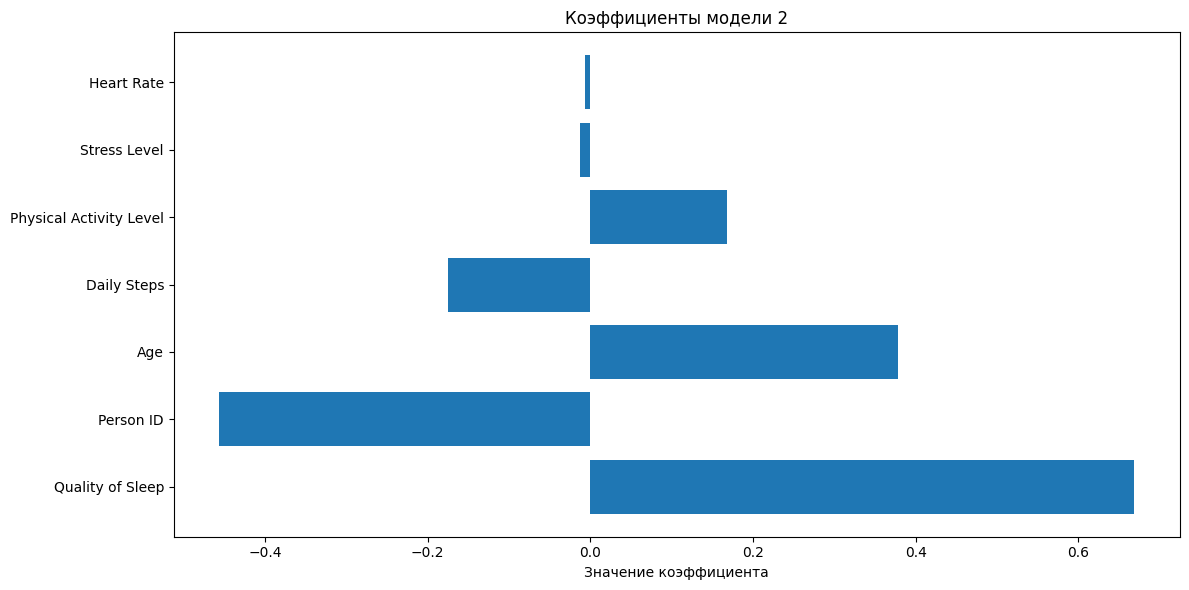

Коэффициенты модели 2:
                   feature  coefficient
2         Quality of Sleep     0.668744
0                Person ID    -0.455906
1                      Age     0.378673
6              Daily Steps    -0.174913
3  Physical Activity Level     0.167742
4             Stress Level    -0.013010
5               Heart Rate    -0.006888


In [ ]:
# Визуализация коэффициентов
coef_df2 = pd.DataFrame({
    'feature': X_processed.columns,
    'coefficient': model2.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df2)), coef_df2['coefficient'])
plt.yticks(range(len(coef_df2)), coef_df2['feature'])
plt.title('Коэффициенты модели 2')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 2:")
print(coef_df2)

In [ ]:
# Модель 3: Отбор признаков
from sklearn.feature_selection import SelectKBest, f_regression

# Отбираем лучшие признаки
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_processed, y_model)

# Получаем названия отобранных признаков
selected_mask = selector.get_support()
best_features = X_processed.columns[selected_mask]

print("Отобранные лучшие признаки:")
print(best_features.tolist())

Отобранные лучшие признаки:
['Person ID', 'Age', 'Quality of Sleep', 'Stress Level', 'Heart Rate']


In [ ]:
# Модель 3: Только лучшие признаки на всей выборке
X_best = X_processed[best_features]

model3 = LinearRegression()
model3.fit(X_best, y_model)
y_pred3 = model3.predict(X_best)

# Метрики
mae3 = mean_absolute_error(y_model, y_pred3)
mse3 = mean_squared_error(y_model, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_model, y_pred3)

print("Модель 3 - Лучшие признаки на всей выборке:")
print(f"MAE: {mae3:.4f}")
print(f"MSE: {mse3:.4f}")
print(f"RMSE: {rmse3:.4f}")
print(f"R²: {r2_3:.4f}")

Модель 3 - Лучшие признаки на всей выборке:
MAE: 0.2993
MSE: 0.1234
RMSE: 0.3513
R²: 0.8046


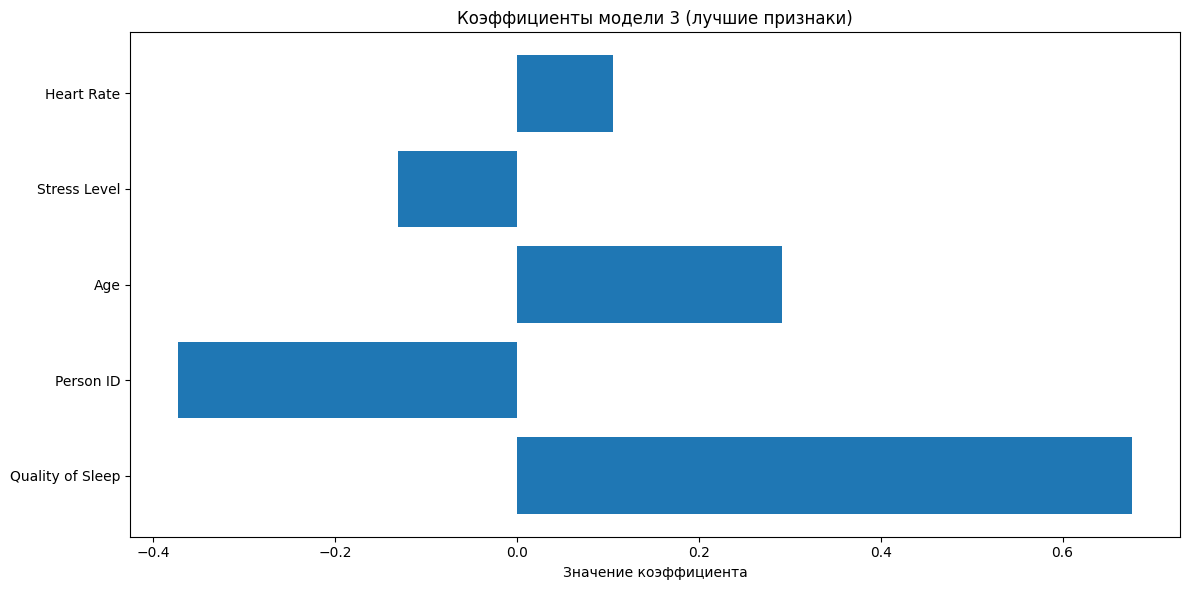

Коэффициенты модели 3:
            feature  coefficient
2  Quality of Sleep     0.676698
0         Person ID    -0.372799
1               Age     0.291063
3      Stress Level    -0.131048
4        Heart Rate     0.105576


In [ ]:
# Визуализация коэффициентов модели 3
coef_df3 = pd.DataFrame({
    'feature': best_features,
    'coefficient': model3.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df3)), coef_df3['coefficient'])
plt.yticks(range(len(coef_df3)), coef_df3['feature'])
plt.title('Коэффициенты модели 3 (лучшие признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 3:")
print(coef_df3)

In [ ]:
# Модель 4: Best features с разделением на train/test
# Сначала нужно определить best_features
from sklearn.feature_selection import SelectKBest, f_regression

# Выбираем лучшие признаки
selector = SelectKBest(score_func=f_regression, k=5)
X_best = selector.fit_transform(X_processed, y_model)

# Получаем названия лучших признаков
best_features_mask = selector.get_support()
best_features = X_processed.columns[best_features_mask]

print("Лучшие признаки:", best_features.tolist())

Лучшие признаки: ['Person ID', 'Age', 'Quality of Sleep', 'Stress Level', 'Heart Rate']


In [ ]:
# Разделяем данные с лучшими признаками
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

print(f"Best features train: {X_best_train.shape}, test: {X_best_test.shape}")

Best features train: (299, 5), test: (75, 5)


In [ ]:
# Обучаем модель 4
model4 = LinearRegression()
model4.fit(X_best_train, y_train)

# Предсказания
y_train_pred4 = model4.predict(X_best_train)
y_test_pred4 = model4.predict(X_best_test)

# Метрики для train и test
mae_train4 = mean_absolute_error(y_train, y_train_pred4)
mse_train4 = mean_squared_error(y_train, y_train_pred4)
rmse_train4 = np.sqrt(mse_train4)
r2_train4 = r2_score(y_train, y_train_pred4)

mae_test4 = mean_absolute_error(y_test, y_test_pred4)
mse_test4 = mean_squared_error(y_test, y_test_pred4)
rmse_test4 = np.sqrt(mse_test4)
r2_test4 = r2_score(y_test, y_test_pred4)

print("Модель 4 - Best features с train/test split:")
print("\nОБУЧАЮЩАЯ ВЫБОРКА:")
print(f"MAE: {mae_train4:.4f}")
print(f"MSE: {mse_train4:.4f}")
print(f"RMSE: {rmse_train4:.4f}")
print(f"R²: {r2_train4:.4f}")

print("\nТЕСТОВАЯ ВЫБОРКА:")
print(f"MAE: {mae_test4:.4f}")
print(f"MSE: {mse_test4:.4f}")
print(f"RMSE: {rmse_test4:.4f}")
print(f"R²: {r2_test4:.4f}")

Модель 4 - Best features с train/test split:

ОБУЧАЮЩАЯ ВЫБОРКА:
MAE: 0.2988
MSE: 0.1223
RMSE: 0.3497
R²: 0.8027

ТЕСТОВАЯ ВЫБОРКА:
MAE: 0.3062
MSE: 0.1286
RMSE: 0.3586
R²: 0.8068


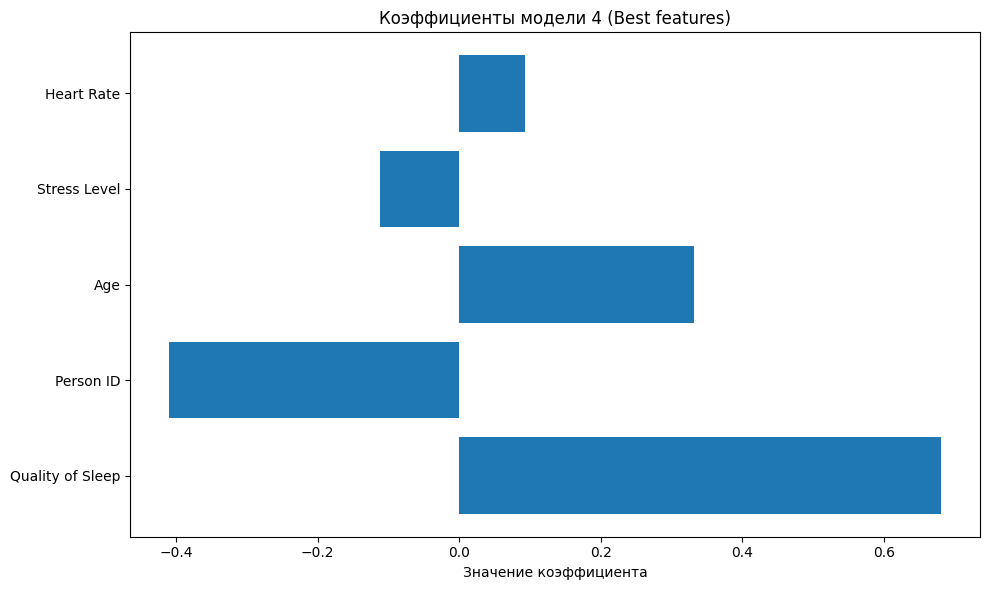

Коэффициенты модели 4:
            feature  coefficient
2  Quality of Sleep     0.680927
0         Person ID    -0.409967
1               Age     0.331025
3      Stress Level    -0.112299
4        Heart Rate     0.093240


In [ ]:
# Визуализация коэффициентов модели 4
coef_df4 = pd.DataFrame({
    'feature': best_features,
    'coefficient': model4.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(coef_df4)), coef_df4['coefficient'])
plt.yticks(range(len(coef_df4)), coef_df4['feature'])
plt.title('Коэффициенты модели 4 (Best features)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 4:")
print(coef_df4)